# Neuronale Netze

https://www.youtube.com/playlist?list=PLxt59R_fWVzT9bDxA76AHm3ig0Gg9S3So

## Problem: Blumen abmessen

<table><tbody>
<tr>
<td><p><strong>Farbe<strong></p></td>
<td><center style='color:red'><strong>O</strong></center></td>
<td><center style='color:blue'><strong>O</strong></center></td>
<td><center style='color:red'><strong>O</strong></center></td>
<td><center style='color:blue'><strong>O</strong></center></td>
<td><center style='color:red'><strong>O</strong></center></td>
<td><center style='color:blue'><strong>O</strong></center></td>
<td><center style='color:red'><strong>O</strong></center></td>
<td><center style='color:blue'><strong>O</strong></center></td>
<td><center><strong>?</strong></center></td>
</tr>
<tr>
<td><p><strong>Länge<strong></p></td>
<td><center>3</center></td>
<td><center>2</center></td>
<td><center>4</center></td>
<td><center>3</center></td>
<td><center>3.5</center></td>
<td><center>2</center></td>
<td><center>5.5</center></td>
<td><center>1</center></td>
<td><center>4.5</center></td>
</tr>
<tr>
<td><p><strong>Breite<strong></p></td>
<td><center>1.5</center></td>
<td><center>1</center></td>
<td><center>1.5</center></td>
<td><center>1</center></td>
<td><center>.5</center></td>
<td><center>.5</center></td>
<td><center>1</center></td>
<td><center>1</center></td>
<td><center>1</center></td>
</tr>
</tbody></table>

In [1]:
import numpy

data = numpy.array([[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]])

mystery_flower = [4.5, 1]

rot = data[numpy.where(data[:,2] == 1)]
blau = data[numpy.where(data[:,2] == 0)]

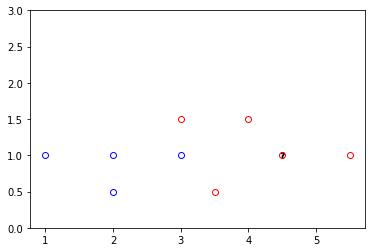

In [10]:
from matplotlib import pyplot
pyplot.ylim(0,3)
pyplot.plot(rot[:,0], rot[:,1], 'ro', mfc='none')
pyplot.plot(blau[:,0], blau[:,1], 'bo', mfc='none')
pyplot.plot(4.5, 1, color='k', marker='$?$', mfc='none')
pyplot.plot(4.5, 1, 'ro', mfc='none')

## Was sind Neuronale Netze?

Neuronale Netze erhalten Eingaben und Schätzen durch mathematische Berechnung eine Ausgabe.

## Sigmoidfunktion

In [4]:
def sigmoid(x):
    return 1 / (1 + numpy.exp(-x))

def sigmoid_abl(x):
    return sigmoid(x) * (1-sigmoid(x))

print(sigmoid(-5))
print(sigmoid(0))
print(sigmoid(5))

0.0066928509242848554
0.5
0.9933071490757153


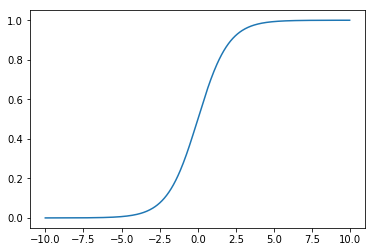

In [5]:
x = numpy.arange(-10, 10, .05)
pyplot.plot(x, sigmoid(x))

## Einfaches Neuronales Netz

In [6]:
# Gewichte und Ausgleich
w1 = .8
w2 = .3
b = .9

print(sigmoid(2 * w1 + 1 * w2 + b))


0.9426758241011313


In [7]:
def NN(m1, m2, w1, w2, b):
    z = m1 * w1 + m2 * w2 + b 
    return sigmoid(z)

In [9]:
numpy.random.randn()

-0.37898755422552066

In [11]:
w1 = numpy.random.randn()
w2 = numpy.random.randn()
b = numpy.random.randn()

print(w1, w2, b)

0.8279224119688209 0.7846675814003238 1.3262040240590394


In [12]:
NN(3, 1.5, w1, w2, b)

0.9932199834588811

In [13]:
NN(2, 1, w1, w2, b)

0.9773949266683812

In [14]:
NN(2, .5, w1, w2, b)

0.966894265728749

## Kostenfunktion und Ableitung

Eine Kostenfunktion gibt wieder, wie "falsch" ein Ergebnis ist, deswegen versucht man dieses Ergebnis zu minimieren.

In [15]:
def cost(b):
    return (b - 4) ** 2

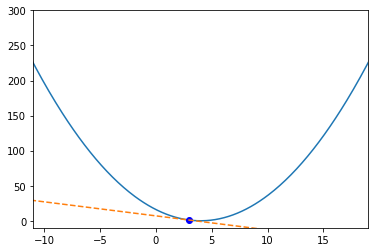

In [23]:
slope = lambda b: 2 * (b - 4)

def plot_slope(b):
    x = numpy.arange(-50, 50, .1)
    pyplot.xlim(-11,19)
    pyplot.ylim(-10,300)

    pyplot.plot(x, cost(x))

    pyplot.plot(b, cost(b), 'bo')
    a = lambda x: slope(b) * (x - b) + cost(b)
    pyplot.plot(x, a(x), '--')    
    pyplot.show()

plot_slope(3)

In [18]:
def num_slope(b):
    h = 0.0001
    return (cost(b + h) - cost(b)) / h

In [19]:
num_slope(3)

-1.9999000000037181

In [20]:
num_slope(5)

2.000099999994731

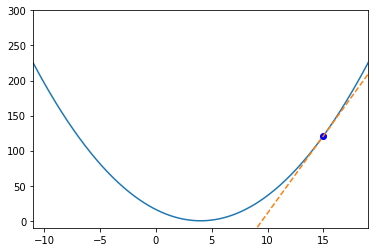

12.8


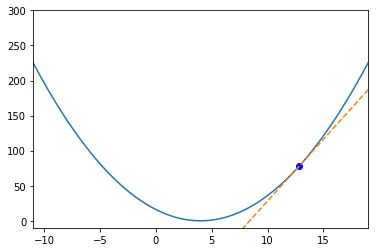

11.040000000000001


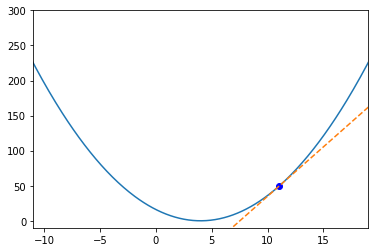

9.632000000000001


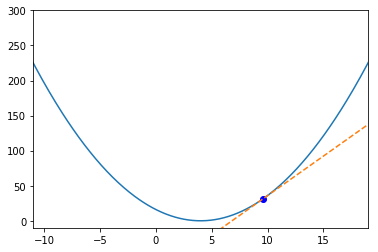

8.505600000000001


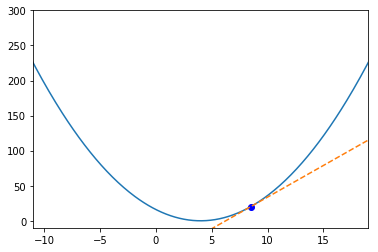

7.604480000000001


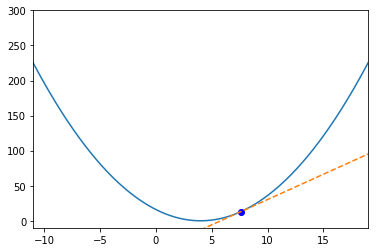

6.883584000000001


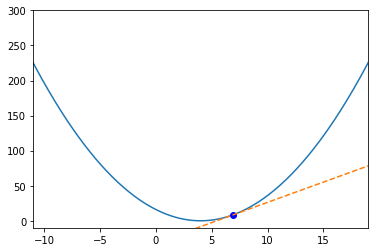

6.306867200000001


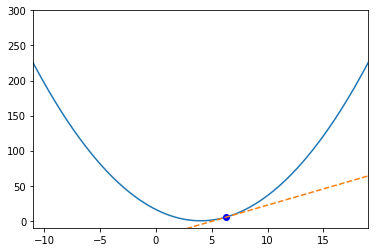

5.845493760000001


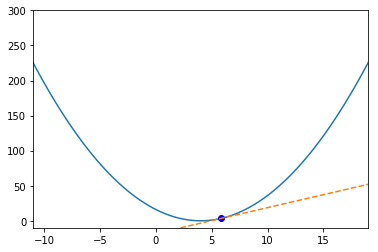

5.476395008000001


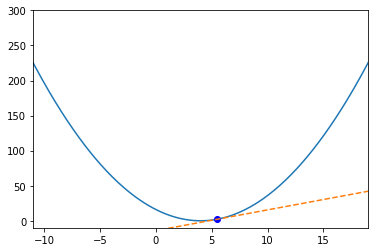

5.181116006400001


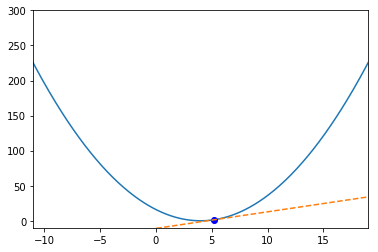

In [26]:
b = 15
for i in range(10):
    plot_slope(b)
    b = b - .1 * slope(b)
    print(b)
plot_slope(b)

## Neuronales Netz

w1 = 2.479031595063
w2 = 1.0254191141852467
b = -8.381833924953172


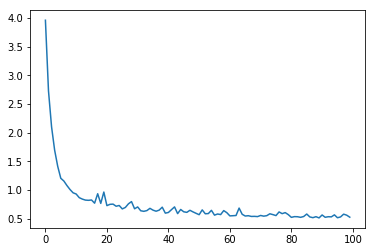

In [38]:
def train():    
    # Zufällige Initialwerte
    w1 = numpy.random.randn()
    w2 = numpy.random.randn()
    b = numpy.random.randn()
    
    # Anzahl der Durchgänge
    iterations = 10000
    
    # Lernrate (Anteil der Kosten, um die verbessert wird)
    learning_rate = 0.1
    
    costs = []
    
    for i in range(iterations):
        
        # Zufällige Werte Aussuchen
        index = numpy.random.randint(len(data))
        point = data[index]
        
        # Array in Variablen auspacken
        m1, m2, target = point
        
        # Schätzung ausrechnen und zwischen 0 und 1 einschränken
        z = m1 * w1 + m2 * w2 + b
        prediction = sigmoid(z)
        
        # Kosten berechnen
        cost = numpy.square(prediction - target)
        
        # Nun müssen wir die partiellen Ableitungen berechnen (Achtung Mathematik)
        # Damit "hangeln" wir uns Rückwärts durch das Modell um die Ausganswerte ändern zu können.
        # d => derivative = Ableitung
        
        # Abbleitung der Kostenfunktion nach der Schätzung
        dcost_prediction = 2 * (prediction - target) 
        
        # Ableitung der Schätzungsfunktion nach z
        dprediction_z = sigmoid_abl(z) 
        
        # Ableitung der "Z-Funktion" nach w1, w2 und b
        dz_dw1 = m1
        dz_dw2 = m2
        dz_db = 1
        
        # Ableitung der Kostenfunktion nach w1, w2 und b
        dcost_dw1 = dcost_prediction * dprediction_z * dz_dw1
        dcost_dw2 = dcost_prediction * dprediction_z * dz_dw2
        dcost_db = dcost_prediction * dprediction_z * dz_db
        
        # Nun ändern wir die Gewichte und den Bias
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
        # Hier werden die Kosten für alle Punkte berechnet und gespeichert
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(p[0] * w1 + p[1] * w2 + b)
                c += numpy.square(p_pred - p[2])
            costs.append(c)
            
    return costs, w1, w2, b

costs, w1, w2, b = train()

print("w1 = {}".format(w1))
print("w2 = {}".format(w2))
print("b = {}".format(b))
pyplot.plot(costs)

## Welche Farbe hat unsere Mystery Flower?

In [39]:
z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
prediction = sigmoid(z)

print(prediction)

0.9781021866910635


## Was Hat unser Neuronales Netz gelernt?

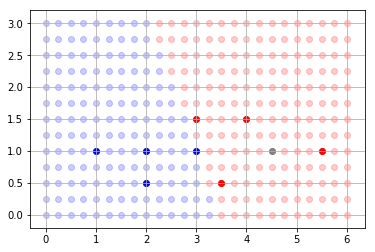

In [40]:
# check out the networks predictions in the x,y plane
for x in numpy.linspace(0, 6, 6*4 + 1):
    for y in numpy.linspace(0, 3, 3 * 4 + 1):
        prediction = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if prediction > .5:
            c = 'r'
        pyplot.scatter([x],[y],c=c, alpha=.2)
        
pyplot.grid()

for i in range(len(data)):
    c = 'r'
    if data[i][2] == 0:
        c = 'b'
    pyplot.scatter([data[i][0]], [data[i][1]], c=c)

pyplot.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')